In [0]:
import torch
import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
import string 
import os
import re
%matplotlib inline

## Import GloVe Embedding as Dictionary

In [0]:
# create embedding dictionary for GloVe embedding (300d)
embedding_dict = dict()
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coef = np.asarray(values[1:],dtype='float32')
    embedding_dict[word] = coef # save word as key and coefficients as the value in the dictionary
f.close()

In [0]:
def preprocess(file):
    processed = [] # preprocess the file
    lines = file.read().split('\n')
    for line in lines:
        line = line.lower() # lower case
        line = line.replace('#','<num>') # replace the token '#' with '<num>'
        line = re.sub(">.<",' point ',line) # replace the token '>.<' with ' point '
        text = re.sub(r"[^a-z?.!,'<>]+"," ",line) # replace other tokens with a space
        text = text.rstrip().strip() # strip white space
        text = 'bos ' + text + ' eos' # beginning and end tokens for each sentence
        processed.append(text)
    return processed

In [0]:
pf_train_in = os.getcwd()+'/train/train.article.txt'
pf_train_sum = os.getcwd()+'/train/train.title.txt'
text_train_in = open(pf_train_in,'r') # load in the data
text_train_sum = open(pf_train_sum,'r') # load in the summaries

# preprocess the text
lines_train_in = preprocess(text_train_in)
lines_train_sum = preprocess(text_train_sum)
# save input text and summaries as a DataFrame
TRAIN = pd.DataFrame({'Input':lines_train_in,'Sum1':lines_train_sum})

In [0]:
TRAIN.head() # display text and summaries

,Input,Sum1
0,bos australia 's current account deficit shrun...,bos australian current account deficit narrows...
1,bos at least two people were killed in a suspe...,bos at least two dead in southern philippines ...
2,bos australian shares closed down <num point n...,bos australian stocks close down <num point nu...
3,bos south korea 's nuclear envoy kim sook urge...,bos envoy urges north korea to restart nuclear...
4,bos south korea on monday announced sweeping t...,bos skorea announces tax cuts to stimulate eco...


In [0]:
print("TRAIN has {} articles".format(TRAIN.shape[0])) 

TRAIN has 3803958 articles


In [0]:
TRAIN_in_len = []
TRAIN_sum_len = [] 

# calculate the length of the summary and the input texts
for line in lines_train_in:
    w = 0
    for word in line.split(' '):
        w += 1
    TRAIN_in_len.append(w)
    
for line in lines_train_sum:
    w = 0
    for word in line.split(' '):
        w += 1
    TRAIN_sum_len.append(w)
TRAIN_in_len = np.array(TRAIN_in_len)
TRAIN_sum_len = np.array(TRAIN_sum_len) 

In [0]:
print("\t\t Min\t 25%\t Avg\t 75%\t Max")
print("\nTRAIN Input\t {}\t{}\t{}\t{}\t{}".format(np.percentile(TRAIN_in_len,0),np.percentile(TRAIN_in_len,25),np.percentile(TRAIN_in_len,50),np.percentile(TRAIN_in_len,75),np.percentile(TRAIN_in_len,100)))
print("TRAIN Summary\t {}\t{}\t{}\t{}\t{}".format(np.percentile(TRAIN_sum_len,0),np.percentile(TRAIN_sum_len,25),np.percentile(TRAIN_sum_len,50),np.percentile(TRAIN_sum_len,75),np.percentile(TRAIN_sum_len,100)))


		 Min	 25%	 Avg	 75%	 Max

TRAIN Input	 3.0	29.0	34.0	39.0	130.0
TRAIN Summary	 3.0	9.0	10.0	12.0	76.0


In [0]:
lines_train_in = TRAIN.iloc[:,0].values
lines_train_sum = TRAIN.iloc[:,1].values

(array([1.00000e+00, 0.00000e+00, 6.00000e+00, 1.10310e+04, 2.80080e+04,
        6.83570e+04, 7.09900e+04, 1.77520e+05, 1.82373e+05, 3.94482e+05,
        3.33967e+05, 5.86758e+05, 6.08298e+05, 3.47617e+05, 3.88372e+05,
        1.78841e+05, 1.81985e+05, 7.74680e+04, 7.44690e+04, 3.00340e+04,
        2.85920e+04, 1.15240e+04, 1.05650e+04, 4.07200e+03, 3.79200e+03,
        2.01600e+03, 8.32000e+02, 7.68000e+02, 3.11000e+02, 3.61000e+02,
        1.42000e+02, 1.49000e+02, 5.80000e+01, 7.70000e+01, 3.20000e+01,
        3.80000e+01, 1.80000e+01, 2.50000e+01, 6.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  3.  ,   5.54,   8.08,  10.62,  13.16,  15.7 ,  18.24,  20.78,
         23.32,  25.86,  28.4 ,  30.94,  33.48,  36.02,  38.56,  41.1 ,
         43.64,  46.18,  48.72,  51.26,  53.8 ,  56.34,  58.88,  61.42,
         63.96,  66.5 ,  69.04,  71.58,  74.12,  76.

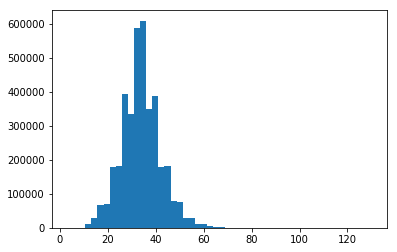

In [0]:
plt.hist(TRAIN_in_len,bins=50) # plot histogram of the length of input text

(array([2.250000e+02, 3.429000e+03, 3.949560e+05, 4.589540e+05,
        1.272175e+06, 5.745740e+05, 6.951070e+05, 1.677130e+05,
        1.638550e+05, 3.454500e+04, 2.826100e+04, 4.896000e+03,
        2.401000e+03, 2.043000e+03, 3.800000e+02, 2.890000e+02,
        6.000000e+01, 4.500000e+01, 1.200000e+01, 1.100000e+01,
        2.000000e+00, 8.000000e+00, 2.000000e+00, 3.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 4.000000e+00]),
 array([ 3.  ,  4.46,  5.92,  7.38,  8.84, 10.3 , 11.76, 13.22, 14.68,
        16.14, 17.6 , 19.06, 20.52, 21.98, 23.44, 24.9 , 26.36, 27.82,
        29.28, 30.74, 32.2 , 33.66, 35.12, 36.58, 38

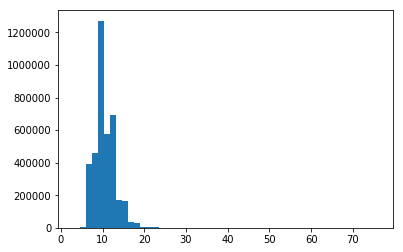

In [0]:
plt.hist(TRAIN_sum_len,bins=50) # plot histogram of the length of summary

In [0]:
# remove outliers
a = np.where(np.logical_and(TRAIN_in_len>=20,np.logical_and(TRAIN_in_len<=50,np.logical_and(TRAIN_sum_len>=6,TRAIN_sum_len<=14))))
print(len(a[0]))

3326008


In [0]:
data_indices = np.random.randint(len(a[0]),size=1000000) # randomly choose 1 million samples
indices = a[0][data_indices]

In [0]:
data_text = lines_train_in[indices]
data_sum = lines_train_sum[indices]
output_len = TRAIN_sum_len[indices]

In [0]:
embedding_dict['pad']

array([-3.0522e-02, -2.2719e-01,  3.8781e-01, -7.0417e-01, -1.1544e-01,
       -7.0090e-01, -3.9910e-02,  4.2745e-02,  1.5057e-01, -4.0904e-01,
       -3.8437e-01,  6.8181e-02,  2.9802e-01, -2.8310e-01,  5.3504e-01,
        1.3696e+00, -4.4908e-02,  7.3455e-01,  2.7652e-01, -9.7095e-02,
       -2.4187e-01, -2.0424e-01,  1.5428e-01, -5.6790e-01, -2.5146e-01,
        2.8584e-01,  6.3807e-01,  1.8123e-01,  2.7460e-02,  3.0633e-02,
        4.8657e-02, -2.3110e-01, -3.5313e-01,  3.5028e-01, -1.9633e-01,
        5.9194e-02, -2.8627e-01, -8.3223e-02,  1.6305e-01,  3.4971e-01,
       -3.3111e-01,  3.4556e-01, -6.1087e-01, -1.5548e-01,  2.6479e-02,
       -1.5457e-01,  7.0944e-01, -3.0296e-01, -1.8202e-01, -1.5534e-01,
        3.9994e-01, -1.7475e-01,  3.1277e-01, -3.2295e-01, -1.7056e-01,
        4.1496e-01,  3.5370e-01, -5.5457e-01,  2.7422e-01,  3.0380e-01,
       -6.8106e-02,  1.4468e-01, -3.2422e-01, -1.1255e-01,  5.4311e-02,
        2.1412e-01,  2.3971e-01, -4.2925e-01, -1.1484e-01,  6.83

In [0]:
words = [] # create word list for the words in the input text and summaries
for line in data_text:
    for word in line.split(' '):
        words.append(word)
for line in data_sum:
    for word in line.split(' '):
        words.append(word)
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
embed_dim = 300
words_found = 0
words_OOV = 0
word2idx = {}
word2idx['<pad>'] = 0
# convert words to index by creating word2idx dictionary
for index, word in enumerate(vocab):
    word2idx[word] = index+1
# create weight embedding matrix for GloVe embedding
weight_embedding = np.zeros([len(vocab)+1,embed_dim],dtype='float32')
for i, word in enumerate(vocab):
    try:
        # if word found in pretrained GloVe embedding dictionary
        weight_embedding[i,:] = embedding_dict[word]
        words_found += 1
    except:
        # if word not found, initialize as random vector
        weight_embedding[i,:] = np.random.normal(scale=0.6, size=[embed_dim,])
        words_OOV += 1

print("{} words found".format(words_found))
print("{} OOV words".format(words_OOV))
idx2word = dict((v,k) for k,v in word2idx.items())
print("{} words in the vocabulary".format(len(vocab)))
        

93755 words found
1839 OOV words
95594 words in the vocabulary


In [0]:
text_ints = []
summary_ints = []
# convert input text and summaries from words to integers
for each in data_text:
    sentence = []
    for word in each.split():
        sentence.extend([word2idx[word]])
    text_ints.append(sentence)
for each in data_sum:
    sentence = []
    for word in each.split():
        sentence.extend([word2idx[word]])
    summary_ints.append(sentence)

# pad input with 'pad' for sequence length = 50
# pad summaries with 'pad' for sequence length = 14
text_len = 50 
summary_len = 14
text_feature = np.zeros((len(text_ints),text_len),dtype=int)
summary_feature = np.zeros((len(summary_ints),summary_len), dtype=int)
for i, row in enumerate(text_ints):
    text_feature[i,:len(row)] = np.array(row)[:text_len]
for i, row in enumerate(summary_ints):
    summary_feature[i,:len(row)] = np.array(row)[:summary_len]

# train test split
split_frac = 0.8 
split_index = int(len(text_feature)*0.8)
train_text, test_text = text_feature[:split_index],text_feature[split_index:]
train_summary, test_summary = summary_feature[:split_index],summary_feature[split_index:]


print("\t\t\tData Shapes:")
print("Train set: \t\t{}".format(train_text.shape), 
      "\nTest set: \t\t{}".format(test_text.shape))

print("\n\n\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_summary.shape),
      "\nTest set: \t\t{}".format(test_summary.shape))


			Data Shapes:
Train set: 		(800000, 50) 
Test set: 		(200000, 50)


			Feature Shapes:
Train set: 		(800000, 14) 
Test set: 		(200000, 14)


In [0]:
# save the data an .npz file
np.savez('data1M300d.npz',train_text=train_text,test_text=test_text,
         train_summary=train_summary,test_summary=test_summary,
         word2idx = word2idx,idx2word=idx2word, embed_matrix=weight_embedding, output_length = output_len)
print("Data Saved!")

Data Saved!


In [7]:
import torch
import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
import string 
import os
import re
import queue
%matplotlib inline

# load in the data
print("Loading data")
data = np.load('data100k300d.npz')
train_text = data['train_text']
test_text = data['test_text']
train_summary = data['train_summary']
test_summary = data['test_summary']
word2idx = data['word2idx']
word2idx = dict(word2idx.item())
idx2word = data['idx2word']
idx2word = dict(idx2word.item())
weight_embedding = data['embed_matrix']
weight_embedding = torch.from_numpy(weight_embedding)
output_length = data['output_length']
split_index = int(len(test_text)*0.1)
val_text, test_text  = test_text[:split_index],test_text[split_index:]
val_summary, test_summary  = test_summary[:split_index],test_summary[split_index:]
print('Data Loaded!')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device to run the code on GPU


Loading data
Data Loaded!


In [8]:
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F


def create_emb(weight_matrix, non_trainable=False):
    # create embedding matrix with the pretrained GloVe embedding matrix
    emb_layer = torch.nn.Embedding(weight_matrix.shape[0],weight_matrix.shape[1])
    emb_layer.load_state_dict({'weight': weight_matrix})
    if non_trainable:
        emb_layer.weight.requires_grad = False # turn off training for the embedding vector
    return emb_layer


class Encoder(nn.Module):
    def __init__(self,kernel_size,filter_size,dropout,num_hidden,layers,weight_matrix,embed_dim,device):
        super(Encoder,self).__init__()
        self.layers = layers
        self.kernel_size = kernel_size
        self.filter_size = filter_size
        self.num_hidden = num_hidden
        self.device = device
        self.embed_dim = embed_dim
        
        # convolutional layers
        self.conv1 = torch.nn.Conv1d(embed_dim,self.filter_size,self.kernel_size[0],stride=1,padding=0)
        self.conv2 = torch.nn.Conv1d(embed_dim,self.filter_size,self.kernel_size[1],stride=1,padding=1)
        self.conv3 = torch.nn.Conv1d(embed_dim,self.filter_size,self.kernel_size[2],stride=1,padding=2)
        self.dropout = torch.nn.Dropout(dropout)
        self.embedding = create_emb(weight_matrix,True)
        # encoder LSTM
        self.lstm = torch.nn.LSTM(input_size = self.embed_dim,hidden_size = self.num_hidden,
                                  num_layers = self.layers,batch_first=True,dropout=0.5,
                                 bidirectional=True)
    def forward(self,x,hidden):
        x = self.embedding(x) # embed the input text
        
        # convolutional layers
        #x1 = torch.tanh(self.dropout(self.conv1(x)))
        #x2 = torch.tanh(self.dropout(self.conv2(x)))
        #x3 = torch.tanh(self.dropout(self.conv3(x)))
        # apply dropout
        lstm_in = self.dropout((x))
        # encoder LSTM
        output,(h_hidden,c_hidden) = self.lstm(lstm_in,hidden)
        # hidden state of the encoder (in case of multilayer LSTM)
        h = torch.cat((h_hidden[-1,:,:],h_hidden[-2,:,:]),1)
        c = torch.cat((c_hidden[-1,:,:],c_hidden[-2,:,:]),1)

        hidden = (h.unsqueeze(0),c.unsqueeze(0))
       
        return output, hidden
    
    def init_hidden(self,batch_size):
        # initialize the hidden state as the zero tensor
        weight = next(self.parameters()).data
        hidden = (weight.new(self.layers*2,batch_size, self.num_hidden).zero_(),
                  weight.new(self.layers*2, batch_size, self.num_hidden).zero_())
        return hidden
        

        

In [9]:

# code for the attentional decoder
class AttentionDecoder(nn.Module):
    def __init__(self,num_hidden,dropout,vocab_size,layers,weight_matrix,embed_dims,device):
        super(AttentionDecoder,self).__init__()
        self.num_hidden = num_hidden
        self.dropout = dropout
        self.layers = layers
        self.vocab_size = vocab_size
        self.embed_dims = embed_dims
        self.device = device
        self.dropout_layer = torch.nn.Dropout(self.dropout)
        
        # Linear layers for the attention mechanism
        self.V = torch.nn.Linear(self.num_hidden,1)
        
        # layer to get the pointer probability
        self.generator = torch.nn.Linear(2*self.num_hidden+self.embed_dims,1)
        # output layer to vocab
        self.output_layer = torch.nn.Linear(2*self.num_hidden,self.vocab_size)
        # softmax function
        self.softmax = torch.nn.Softmax(dim=1)
        # decoder LSTM
        self.lstm = torch.nn.LSTM(input_size = self.num_hidden+self.embed_dims,hidden_size = self.num_hidden,
                                  num_layers = self.layers,batch_first=True,dropout=0.5,
                                 bidirectional=False)
        # embedding matrix
        self.embedding = create_emb(weight_matrix,True)
        self.sig = torch.nn.Sigmoid()
        self.device = device
        
        
    def forward(self,x,enc_out,hidden,text,batch_size):
        # decoder
        # Decoder Input Shape: [batch_size]
        x = self.embedding(x).unsqueeze(1)
        # Decoder Embedded Shape: [batch_size,1,embed_dim]
        x = self.dropout_layer(x)
        
        # Bahdanau Attention
        dec_a = hidden[0].permute(1,0,2)
        enc_score = self.V(torch.tanh(enc_out + dec_a)) # attention score
        # Attention Score Shape: [batch_size,input_seq_len,1]
        enc_weight = self.softmax(enc_score) # attention weight
        # Attention Weight Shape: [batch_size,input_seq_len,1]
        enc_context = torch.mul(enc_weight,enc_out) # find the context vector
        # Attention Context Shape: [batch_size,input_seq_len,decoder_num_hidden]
        enc_context = enc_context.sum(1)
        # Attention Context Shape: [batch_size,decoder_num_hidden]
        enc_context.unsqueeze_(1)
        # Attention Context Shape: [batch_size,1,decoder_num_hidden]     
        
        d_in = torch.cat((x,enc_context),2)
        # Decoder Input Shape: [batch_size,1,decoder_num_hidden+embed_dims]  
        
        # run the decoder LSTM
        d_output, hidden = self.lstm(d_in,hidden)
        # Decoder Output Shape: [batch_size,1,decoder_num_hidden]  
        # Decoder Hidden Shape: [1,batch_size,decoder_num_hidden]  

        # concatenate output with the encoder context tensor
        output = torch.cat((d_output.squeeze(1),enc_context.squeeze(1)),1)
        # Decoder Output Shape: [batch_size,2*decoder_num_hidden]  
        
        output_generator = torch.cat((enc_context.squeeze(1),d_output.squeeze(1),x.squeeze(1)),1)
        # Generator Input Shape: [batch_size,2*decoder_num_hidden + embed_dims]  
        
        p_gen = self.sig(self.generator(output_generator).squeeze(1))
        
        # pointer-generator
        p_pointer = 1 - p_gen
        pointer_prob = torch.zeros([batch_size,self.vocab_size],device=self.device)
        for i in range(batch_size):
            pointer_prob[i,text[i,:]] = enc_weight[i,:,0] # pointer probability weights are the attention scores
        generator_prob = self.output_layer(output) # output layer to get vocabulary probability
        output_probability = torch.mul(p_pointer.unsqueeze(1),pointer_prob) + torch.mul(p_gen.unsqueeze(1),generator_prob)
        
        return output_probability, hidden
    
    def init_hidden(self,batch_size):
        # initialize the hidden state as the zero tensor
        weight = next(self.parameters()).data
        hidden = (weight.new(self.layers, batch_size, 2*self.num_hidden).zero_(),
                  weight.new(self.layers, batch_size, 2*self.num_hidden).zero_())
        return hidden


In [10]:
# hyperparameters of the mode
kernel_size = [1,3,5] # kernel size for CNN
filter_size = 100 # number of kernels used in CNN
dropout = 0.5 # dropout probability
num_hidden = 256 # number of hidden units in LSTMs
enc_layers = 1 # number of layers in the LSTM encoder
batch_size = 32
vocab_size = len(word2idx) # length of vocab
dec_layers = 1 # number of layers in the LSTM decoder
embed_dims = 300 # embedding dimensions

# create a beam search node to store the running sequences for the beam search decoder
# and records the hidden state associated with the sequence, the probability and the loss
class BeamNode(object):
    def __init__(self,hidden_state,seq,prob,length,loss):
        self.hidden = hidden_state
        self.seq = seq
        self.prob = prob
        self.len = length
        self.loss = loss
        self.s = self.score()
        
    def score(self):
        return self.prob/float(self.len-1+1e-6) # calculates the score of a sequence

class Seq2Seq(nn.Module):
    def __init__(self,kernel_size,filter_size,dropout,num_hidden,enc_layers,weight_embedding,
                vocab_size,dec_layers,embed_dims,device):
        super(Seq2Seq, self).__init__()
        self.vocab_size = vocab_size
        self.device = device
        self.encoder = Encoder(kernel_size,filter_size,dropout,num_hidden,enc_layers,weight_embedding,embed_dims,device)
        self.decoder = AttentionDecoder(2*num_hidden,dropout,vocab_size,dec_layers,weight_embedding,embed_dims,device)
    
    def forward(self,x,target,e_hidden,criterion,batch_size):
        # training the decoder
        loss = 0
        prediction = target[:,0].unsqueeze(1) # records the running sequences generated by the decoder
        enc_output,enc_hidden = self.encoder(x,e_hidden) # run the encoder
        d_hidden = enc_hidden # the decoder input hidden state is the encoder output hidden state
        dec_input = target[:,0] # the decoder input starts of as the 'bos' token
        for t in range(1,target.shape[1]):
            # run the decoder
            logits, d_hidden = self.decoder(dec_input,enc_output,d_hidden,x,batch_size)
            dec_input = target[:,t] # teacher forcing turned on 
            loss += criterion(logits,target[:,t]) # calculate the loss function
            # add to get the running prediction output by the decoder
            prediction = torch.cat((prediction,torch.argmax(logits,dim=0).unsqueeze(1)),0)
        return loss, prediction
    
    def inference_greedy(self,x,target,e_hidden,criterion,batch_size):
        loss = 0
        prediction = target[:,0].unsqueeze(1) # records the running sequences generated by the decoder
        enc_output,enc_hidden = self.encoder(x,e_hidden) # run the encoder
        d_hidden = enc_hidden # the decoder input hidden state is the encoder output hidden state
        dec_input = target[:,0] # the decoder input starts of as the 'bos' token
        for t in range(1,target.shape[1]):
            # run the decoder
            logits, d_hidden = self.decoder(dec_input,enc_output,d_hidden,x,batch_size)
            # the input to the decoder at the next step is the argument with the largest probability
            dec_input = torch.argmax(logits,dim=1)
            loss += criterion(logits,target[:,t]) # calculate the loss
            # add to get the running prediction output by the decoder
            prediction = torch.cat((prediction,torch.argmax(logits,dim=0).unsqueeze(1)),0)
        return loss, prediction
    
    def inference_beam(self,x,target,e_hidden,criterion,beam_width,batch_size):
        decoded = [] 
        losses = 0
        enc_output,enc_hidden = self.encoder(x,e_hidden) # run the encoder
        for i in range(batch_size):
            # for each sentence in the batch
            prediction = target[i,0].view([1]).unsqueeze(1) # running prediction tensor
            dec_hidden = enc_hidden[0].permute(1,0,2)[i,:,:].unsqueeze(0)
            dec_input = target[i,0].view([1])
            d_hidden = (enc_hidden[0][:,i,:].unsqueeze(0),enc_hidden[1][:,i,:].unsqueeze(0))
            first_node = BeamNode(d_hidden,dec_input,0,1,0) # the first node is the 'bos' token
            nodes = queue.PriorityQueue(maxsize=beam_width) # create a priority queue to store the beam search nodes
            nodes.put((-first_node.score(),first_node)) # place the first node in the queue
            for t in range(1,target.shape[1]):
                # go through each of the words in the target
                candidatenodes = [] # stores the candidate nodes for a one step look ahead
                candidatescore = [] # stores the candidate scores for a one step look ahead
                donenodes = [] # stores the sequences that have been completed - contain 'eos' token

                # This runs through the 10 sequences in the queue and does a one step look ahead
                # to find 100 possible candidates. The top 10 candidates are then added to the queue
                # and the next word of the decoder is computed
                
                for _ in range(nodes.qsize()):
                    # for each sequence in the queue
                    sc,nodex = nodes.get() # get the node from the queue
                    seq = nodex.seq.view([-1,1]) # the sequence in the node
                    dec_input = seq[-1,:] # the last word of the sequence is the input to the decoder
                    hidden = nodex.hidden # the hidden state associated with the sequence
                    d_hidden = (hidden[0],hidden[1]) # the hidden state of the decoder

                    if dec_input == word2idx['eos']:
                        # if the sequence is completed, then it is added to 'donenodes' list
                        donenodes.append((sc,nodex))
                    else:
                        # run the decoder
                        logits, d_hidden = self.decoder(dec_input,enc_output[i,:,:].unsqueeze(0),d_hidden,x,batch_size=1)
                        # calculate the loss
                        loss = criterion(logits,target[i,t].view([1]))
                        # pick the top 10 logits values
                        log_p, index = torch.topk(logits,beam_width)
                        for k in range(beam_width):
                            # create a beam node for each of the top 10 to get the candidate nodes
                            node = BeamNode(d_hidden, torch.cat([nodex.seq,index[0,k].unsqueeze(0)]),nodex.prob+log_p[0][k],nodex.len+1,nodex.loss+loss)
                            score = -node.score()
                            candidatenodes.append([score,node])
                # put the finished sequences first in the queue first and then fill with candidate nodes
                for score,n in donenodes:
                    nodes.put((score,n))
                for score,n in candidatenodes[nodes.qsize():beam_width]:
                    nodes.put((score,n))
            _,output_node = nodes.get()
            
            # the output of the beam search decoder is the sequence with the lowest score
            decoded.append(output_node.seq)
            losses+=output_node.loss
            del nodes
        return losses/batch_size,decoded
    

In [11]:
def get_batches(x, y,batch_size=100):
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [12]:
import time

epochs = 15
learning_rate = 0.001
# initialize model
model = Seq2Seq(kernel_size,filter_size,dropout,num_hidden,enc_layers,weight_embedding,
                vocab_size,dec_layers,embed_dims,device).to(device)
# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
# cross entropy loss function with the padding ignored
criterion = nn.CrossEntropyLoss(ignore_index=0)
counter = 0
loss = []
beam_width = 10 # beam search width is 10
for e in range(epochs):
    start_time = time.time() # start timer
    # shuffle the data at the beginning of epoch
    p = np.random.permutation(train_summary.shape[0])
    train_text = train_text[p,:]
    train_summary = train_summary[p,:]
    # initialize encoder initial hidden state
    e_hidden = model.encoder.init_hidden(batch_size)
    
    for x,y in get_batches(train_text,train_summary,batch_size):
        model.train()
        # convert inputs to PyTorch tensor
        x = torch.from_numpy(x).to(device)
        y = torch.from_numpy(y).to(device)
        
        e_hidden = tuple([each.data for each in e_hidden])
        optimizer.zero_grad() # zero the gradients of the model
        # train the model
        l,prediction = model(x,y,e_hidden,criterion,batch_size)
        loss.append(l.item()) # add loss function
        l.backward()
        nn.utils.clip_grad_norm_(model.parameters(),2) # gradient clip with norm = 2
        optimizer.step() # step the optimizer to apply the gradient
        
        if counter%50 == 0:
            print("Epoch: {}/{} ".format(e+1, epochs),
                      "\tStep: {} ".format(counter),
                      "\tLoss: {:.4f} ".format(l.item()))
        counter += 1
    print("Time to train epoch: {0} s".format(time.time()-start_time))


Epoch: 1/15  	Step: 0  	Loss: 141.9948 
Epoch: 1/15  	Step: 50  	Loss: 92.8735 
Epoch: 1/15  	Step: 100  	Loss: 84.0220 
Epoch: 1/15  	Step: 150  	Loss: 78.2484 
Epoch: 1/15  	Step: 200  	Loss: 81.2634 
Epoch: 1/15  	Step: 250  	Loss: 76.2267 
Epoch: 1/15  	Step: 300  	Loss: 83.6968 
Epoch: 1/15  	Step: 350  	Loss: 84.6046 
Epoch: 1/15  	Step: 400  	Loss: 85.4649 
Epoch: 1/15  	Step: 450  	Loss: 78.7258 
Epoch: 1/15  	Step: 500  	Loss: 78.5601 
Epoch: 1/15  	Step: 550  	Loss: 88.6967 
Epoch: 1/15  	Step: 600  	Loss: 67.9000 
Epoch: 1/15  	Step: 650  	Loss: 79.5246 
Epoch: 1/15  	Step: 700  	Loss: 74.8440 
Epoch: 1/15  	Step: 750  	Loss: 75.3816 
Epoch: 1/15  	Step: 800  	Loss: 74.4047 
Epoch: 1/15  	Step: 850  	Loss: 78.3814 
Epoch: 1/15  	Step: 900  	Loss: 78.0796 
Epoch: 1/15  	Step: 950  	Loss: 72.6038 
Epoch: 1/15  	Step: 1000  	Loss: 77.3561 
Epoch: 1/15  	Step: 1050  	Loss: 81.0590 
Epoch: 1/15  	Step: 1100  	Loss: 72.0654 
Epoch: 1/15  	Step: 1150  	Loss: 69.8134 
Epoch: 1/15  	

Epoch: 4/15  	Step: 9650  	Loss: 50.0437 
Epoch: 4/15  	Step: 9700  	Loss: 50.1892 
Epoch: 4/15  	Step: 9750  	Loss: 48.8464 
Epoch: 4/15  	Step: 9800  	Loss: 48.1849 
Epoch: 4/15  	Step: 9850  	Loss: 53.3362 
Epoch: 4/15  	Step: 9900  	Loss: 50.3443 
Epoch: 4/15  	Step: 9950  	Loss: 45.4564 
Time to train epoch: 1389.3618381023407 s
Epoch: 5/15  	Step: 10000  	Loss: 45.8945 
Epoch: 5/15  	Step: 10050  	Loss: 39.8304 
Epoch: 5/15  	Step: 10100  	Loss: 39.1575 
Epoch: 5/15  	Step: 10150  	Loss: 36.6136 
Epoch: 5/15  	Step: 10200  	Loss: 38.2140 
Epoch: 5/15  	Step: 10250  	Loss: 39.2443 
Epoch: 5/15  	Step: 10300  	Loss: 39.4646 
Epoch: 5/15  	Step: 10350  	Loss: 41.5406 
Epoch: 5/15  	Step: 10400  	Loss: 36.8862 
Epoch: 5/15  	Step: 10450  	Loss: 33.6260 
Epoch: 5/15  	Step: 10500  	Loss: 40.2368 
Epoch: 5/15  	Step: 10550  	Loss: 44.9388 
Epoch: 5/15  	Step: 10600  	Loss: 43.1830 
Epoch: 5/15  	Step: 10650  	Loss: 49.1766 
Epoch: 5/15  	Step: 10700  	Loss: 40.2547 
Epoch: 5/15  	Step:

Epoch: 8/15  	Step: 19000  	Loss: 32.0367 
Epoch: 8/15  	Step: 19050  	Loss: 36.9760 
Epoch: 8/15  	Step: 19100  	Loss: 31.3112 
Epoch: 8/15  	Step: 19150  	Loss: 38.8018 
Epoch: 8/15  	Step: 19200  	Loss: 33.4501 
Epoch: 8/15  	Step: 19250  	Loss: 33.9018 
Epoch: 8/15  	Step: 19300  	Loss: 38.3106 
Epoch: 8/15  	Step: 19350  	Loss: 35.8445 
Epoch: 8/15  	Step: 19400  	Loss: 34.4174 
Epoch: 8/15  	Step: 19450  	Loss: 36.9865 
Epoch: 8/15  	Step: 19500  	Loss: 35.6074 
Epoch: 8/15  	Step: 19550  	Loss: 35.2710 
Epoch: 8/15  	Step: 19600  	Loss: 33.1237 
Epoch: 8/15  	Step: 19650  	Loss: 37.5752 
Epoch: 8/15  	Step: 19700  	Loss: 36.7445 
Epoch: 8/15  	Step: 19750  	Loss: 36.8472 
Epoch: 8/15  	Step: 19800  	Loss: 37.6922 
Epoch: 8/15  	Step: 19850  	Loss: 32.5437 
Epoch: 8/15  	Step: 19900  	Loss: 35.2253 
Epoch: 8/15  	Step: 19950  	Loss: 33.9279 
Time to train epoch: 1395.2207427024841 s
Epoch: 9/15  	Step: 20000  	Loss: 34.8348 
Epoch: 9/15  	Step: 20050  	Loss: 32.4806 
Epoch: 9/15 

Epoch: 12/15  	Step: 28200  	Loss: 31.5977 
Epoch: 12/15  	Step: 28250  	Loss: 29.6908 
Epoch: 12/15  	Step: 28300  	Loss: 25.0247 
Epoch: 12/15  	Step: 28350  	Loss: 30.5297 
Epoch: 12/15  	Step: 28400  	Loss: 27.4503 
Epoch: 12/15  	Step: 28450  	Loss: 29.7671 
Epoch: 12/15  	Step: 28500  	Loss: 29.3487 
Epoch: 12/15  	Step: 28550  	Loss: 30.1749 
Epoch: 12/15  	Step: 28600  	Loss: 31.2096 
Epoch: 12/15  	Step: 28650  	Loss: 30.9037 
Epoch: 12/15  	Step: 28700  	Loss: 28.4752 
Epoch: 12/15  	Step: 28750  	Loss: 27.5750 
Epoch: 12/15  	Step: 28800  	Loss: 28.3155 
Epoch: 12/15  	Step: 28850  	Loss: 25.8614 
Epoch: 12/15  	Step: 28900  	Loss: 28.5366 
Epoch: 12/15  	Step: 28950  	Loss: 31.2969 
Epoch: 12/15  	Step: 29000  	Loss: 24.9656 
Epoch: 12/15  	Step: 29050  	Loss: 30.2415 
Epoch: 12/15  	Step: 29100  	Loss: 27.5489 
Epoch: 12/15  	Step: 29150  	Loss: 32.7421 
Epoch: 12/15  	Step: 29200  	Loss: 32.1441 
Epoch: 12/15  	Step: 29250  	Loss: 29.9636 
Epoch: 12/15  	Step: 29300  	Los

Epoch: 15/15  	Step: 37400  	Loss: 26.6001 
Epoch: 15/15  	Step: 37450  	Loss: 25.4084 
Time to train epoch: 1387.3100702762604 s


In [13]:
# beam search decoder
with torch.no_grad():
    beam_time = time.time() # start timer
    loss_beam = [] 
    beam_predict = [] # save beam search decoder outputs
    summary_validation = [] # save validation target summaries
    text_validation = [] # save validation input text
    model.eval()
    # initialize the encoder hidden state
    val_hidden = model.encoder.init_hidden(batch_size)
    for x_val, y_val in get_batches(val_text,val_summary,batch_size):
        # convert data to PyTorch tensor
        x_val = torch.from_numpy(x_val).to(device)
        y_val = torch.from_numpy(y_val).to(device)
        val_hidden = tuple([each.data for each in val_hidden])
        # run the beam search decoder
        val_loss, prediction = model.inference_beam(x,y,val_hidden,criterion,beam_width,batch_size=32)
        loss_beam.append(val_loss.item())
        beam_predict.append(prediction)
        summary_validation.append(y_val)
        text_validation.append(x_val)
    model.train()
    print("Beam Test: {0} s".format(time.time()-beam_time))
    print("Val Beam Search Loss: {:.4f}".format(np.mean(loss_beam)))


Beam Test: 881.8145661354065 s
Val Beam Search Loss: 21.2239


In [14]:
# Run the greedy decoder
with torch.no_grad():
    greedy_time = time.time() # start timer
    loss_greedy = []
    greedy_predict = []
    model.eval()
    # initialize the encoder hidden states
    val_hidden = model.encoder.init_hidden(batch_size=32)
    for x_val, y_val in get_batches(val_text,val_summary,batch_size=32):
        # convert data to PyTorch tensor
        x_val = torch.from_numpy(x_val).to(device) 
        y_val = torch.from_numpy(y_val).to(device)
        val_hidden = tuple([each.data for each in val_hidden])
        # run the greedy decoder
        val_loss, prediction = model.inference_greedy(x,y,val_hidden,criterion,batch_size=32)
        loss_greedy.append(val_loss.item())
        greedy_predict.append(prediction)
        
    model.train()
    print("Greedy Test: {0} s".format(time.time()-greedy_time))
    print("Val Greedy Loss: {:.4f}".format(np.mean(loss_greedy)))
    

Greedy Test: 8.562105417251587 s
Val Greedy Loss: 39.8127


In [15]:
np.savez('AbSumOut.npz',greedy_predict=greedy_predict,beam_predict=beam_predict, text_validation=text_validation,summary_validation=summary_validation,idx2word=idx2word)
print("Data Saved!")

Data Saved!


In [16]:
# save the results of the beam search inference method
beam = []
file = open("beam.txt","w")
for i in beam_predict:
    for p in i:
        array = torch.Tensor.cpu(p).numpy()
        beam_string = ''
        for q in array:
            beam_string += idx2word[q] + ' ' 
        file.write(beam_string+'\n')
        beam.append(beam_string)
file.close()

# save the validation summaries for the input text used in the beam search decoder
summary = []
file = open("validation_summary.txt","w")
for i in summary_validation:
    for p in i:
        array = torch.Tensor.cpu(p).numpy()
        summary_string = ''
        for q in array:
            if q != 0:
                summary_string += idx2word[q] + ' ' 
        file.write(summary_string+'\n')
        summary.append(summary_string)
file.close()

# Save the validation input text as a .txt file
text = []
file = open("validation_text.txt","w")
for i in text_validation:
    for p in i:
        array = torch.Tensor.cpu(p).numpy()
        text_string = ''
        for q in array:
            if q != 0:
                text_string += idx2word[q] + ' ' 
        file.write(text_string+'\n')
        text.append(text_string)
file.close()

In [17]:
## Plotting the error function
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

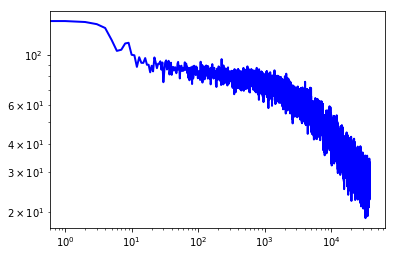

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(loss, color='blue', lw=2)
ax.set_yscale('log')
ax.set_xscale('log')

pylab.show()